Honour Code
I, SHEHAAM MAHOMED, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

In [0]:
"""Import Builtin Python Modules"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

"""Import SciKit Learn Modules"""
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix

"""Import IO modules for Google Colab"""
import io
from google.colab import files

In [2]:
"""Google Colab upload files to be used in the program"""
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving training.csv to training (1).csv


### IMPORTING AND CONCATENATING

In [0]:
train_data = pd.read_csv(io.BytesIO(uploaded['training.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
#sample_sub = pd.read_csv("random_example.csv")

In [4]:
print(train_data.shape)
print(test_data.shape)

(95662, 16)
(45019, 15)


In [0]:
len_train = len(train_data)

In [0]:
y = train_data['FraudResult']
res = test_data['TransactionId']

In [0]:
all_data = pd.concat([train_data, test_data], sort=False)

In [8]:
all_data.head(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0.0


### DATA PREPROCESSING

In [0]:
from sklearn import preprocessing

In [0]:
enc_cols = ['BatchId', 'AccountId', 'SubscriptionId', 
            'CustomerId',  'CurrencyCode', 'CountryCode', 'ProviderId', 
            'ProductId', 'ProductCategory', 'ChannelId']

In [0]:
le = preprocessing.LabelEncoder()

In [0]:
all_data[enc_cols] = all_data[enc_cols].apply(le.fit_transform)

In [13]:
all_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,68522,3286,4711,3786,0,0,5,1,0,2,1000.0,1000,2018-11-15T02:18:49Z,2,0.0
1,TransactionId_73770,45765,4269,3144,3786,0,0,3,23,2,1,-20.0,20,2018-11-15T02:19:08Z,2,0.0
2,TransactionId_26203,88319,3589,1357,4093,0,0,5,0,0,2,500.0,500,2018-11-15T02:44:21Z,2,0.0
3,TransactionId_380,2629,4451,1318,7466,0,0,0,13,9,2,20000.0,21800,2018-11-15T03:32:55Z,2,0.0
4,TransactionId_28195,71473,4269,3144,7466,0,0,3,23,2,1,-644.0,644,2018-11-15T03:34:21Z,2,0.0


In [0]:
import datetime

In [0]:
def calc_time(t1,t2):
  f = '%Y-%m-%d %H:%M:%S'
  t1 = ' '.join(t1.split('T'))[:-1]
  t2 = ' '.join(t2.split('T'))[:-1]
  #t1 = t1[:-1]
  #t2 = t2[:-1]
  d1 = datetime.datetime.strptime(t1, f)
  d2 = datetime.datetime.strptime(t2, f)
  return ((d2-d1).total_seconds())

In [18]:
all_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,68522,3286,4711,3786,0,0,5,1,0,2,1000.0,1000,2018-11-15T02:18:49Z,2,0.0
1,TransactionId_73770,45765,4269,3144,3786,0,0,3,23,2,1,-20.0,20,2018-11-15T02:19:08Z,2,0.0
2,TransactionId_26203,88319,3589,1357,4093,0,0,5,0,0,2,500.0,500,2018-11-15T02:44:21Z,2,0.0
3,TransactionId_380,2629,4451,1318,7466,0,0,0,13,9,2,20000.0,21800,2018-11-15T03:32:55Z,2,0.0
4,TransactionId_28195,71473,4269,3144,7466,0,0,3,23,2,1,-644.0,644,2018-11-15T03:34:21Z,2,0.0


In [0]:
x0 = train_data['TransactionStartTime'][0]

all_data['TimeDiff'] = all_data['TransactionStartTime'].apply(lambda x: calc_time(x0,x))

In [20]:
all_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TimeDiff
0,TransactionId_76871,68522,3286,4711,3786,0,0,5,1,0,2,1000.0,1000,2018-11-15T02:18:49Z,2,0.0,0.0
1,TransactionId_73770,45765,4269,3144,3786,0,0,3,23,2,1,-20.0,20,2018-11-15T02:19:08Z,2,0.0,19.0
2,TransactionId_26203,88319,3589,1357,4093,0,0,5,0,0,2,500.0,500,2018-11-15T02:44:21Z,2,0.0,1532.0
3,TransactionId_380,2629,4451,1318,7466,0,0,0,13,9,2,20000.0,21800,2018-11-15T03:32:55Z,2,0.0,4446.0
4,TransactionId_28195,71473,4269,3144,7466,0,0,3,23,2,1,-644.0,644,2018-11-15T03:34:21Z,2,0.0,4532.0


In [0]:
all_data = all_data.drop(['TransactionStartTime', 'CurrencyCode','CountryCode' ], axis=1)

In [22]:
all_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TimeDiff
0,TransactionId_76871,68522,3286,4711,3786,5,1,0,2,1000.0,1000,2,0.0,0.0
1,TransactionId_73770,45765,4269,3144,3786,3,23,2,1,-20.0,20,2,0.0,19.0
2,TransactionId_26203,88319,3589,1357,4093,5,0,0,2,500.0,500,2,0.0,1532.0
3,TransactionId_380,2629,4451,1318,7466,0,13,9,2,20000.0,21800,2,0.0,4446.0
4,TransactionId_28195,71473,4269,3144,7466,3,23,2,1,-644.0,644,2,0.0,4532.0


In [0]:
train = all_data[:len_train]
test = all_data[len_train:]

In [24]:

print(train.shape)
print(test.shape)

(95662, 14)
(45019, 14)


DATA EXPLORATION

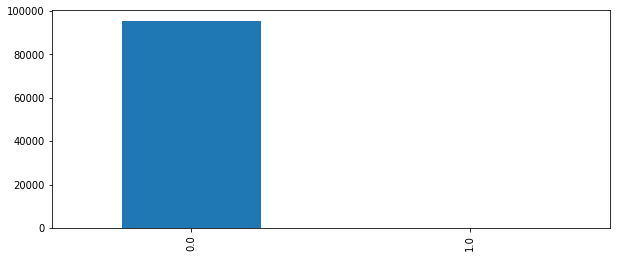

In [25]:
##Visualize distribution
plt.figure(figsize=(10,4))
train.FraudResult.value_counts().plot(kind='bar');

In [26]:
train.FraudResult.value_counts()

0.0    95469
1.0      193
Name: FraudResult, dtype: int64

In [27]:
train.describe()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TimeDiff
count,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,95662.000000,9.566200e+04
mean,69508.504328,3096.725116,2747.746388,3150.842424,3.657157,14.953921,1.274686,1.622410,6.717846e+03,9.900584e+03,2.255974,0.002018,4.143424e+06
std,40203.810338,1350.699460,1170.137089,1923.179894,1.309014,9.048339,1.697917,0.558568,1.233068e+05,1.231221e+05,0.732924,0.044872,2.210932e+06
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+06,2.000000e+00,0.000000,0.000000,0.000000e+00
25%,35235.000000,2049.000000,2089.000000,1787.000000,3.000000,6.000000,0.000000,1.000000,-5.000000e+01,2.750000e+02,2.000000,0.000000,2.359749e+06
50%,69200.500000,3611.000000,3144.000000,2928.000000,4.000000,20.000000,2.000000,2.000000,1.000000e+03,1.000000e+03,2.000000,0.000000,4.028516e+06
75%,104379.500000,4269.000000,3284.000000,4225.000000,5.000000,23.000000,2.000000,2.000000,2.800000e+03,5.000000e+03,2.000000,0.000000,6.165358e+06
max,139492.000000,4839.000000,4835.000000,7477.000000,5.000000,26.000000,9.000000,4.000000,9.880000e+06,9.880000e+06,4.000000,1.000000,7.803759e+06


In [28]:
train.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'PricingStrategy', 'FraudResult', 'TimeDiff'],
      dtype='object')

In [0]:
##########MAYBE SCALING########

TRAINING MODELS

In [0]:
X = train.drop(['TransactionId','FraudResult'], axis=1)

y = train['FraudResult']

In [30]:
X.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,TimeDiff
0,68522,3286,4711,3786,5,1,0,2,1000.0,1000,2,0.0
1,45765,4269,3144,3786,3,23,2,1,-20.0,20,2,19.0
2,88319,3589,1357,4093,5,0,0,2,500.0,500,2,1532.0
3,2629,4451,1318,7466,0,13,9,2,20000.0,21800,2,4446.0
4,71473,4269,3144,7466,3,23,2,1,-644.0,644,2,4532.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
#from sklearn.model_selection import cross_val_score

In [0]:
#def train_df(model, X_t, y_t):
#  model.fit(X_t, y_t)
#  training_score = cross_val_score(model, X_t, y_t, cv=5)
#  return(training_score)


### LOGISTIC REGRESSION MODEL


In [0]:
#LogR = LogisticRegression()

In [0]:
#train_df(LogR, X_train, y_train)

In [0]:
#logr_y_pred = LogR.predict(X_test)

In [0]:
#print('\n\nClassification Report:\n\n', classification_report(y_test, logr_y_pred))

In [0]:
#print('\nThe test confusion matrix:\n', confusion_matrix(y_test,logr_y_pred))

### SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
os = SMOTE(random_state=42)

In [0]:
os_X_train,os_y_train=os.fit_sample(X,y)

In [0]:
os_X_train = pd.DataFrame(data=os_X_train,columns=X_train.columns )
os_y_train= pd.DataFrame(data=os_y_train,columns=["FraudResult"])

In [36]:
print("length of oversampled data is ",len(os_X_train))
print("Not Fraud oversampled data:",len(os_y_train[os_y_train["FraudResult"]==0]))
print("Fraud oversampled data",len(os_y_train[os_y_train["FraudResult"]==1]))

length of oversampled data is  190938
Not Fraud oversampled data: 95469
Fraud oversampled data 95469


In [37]:
print("Not Fraud: ",len(os_y_train[os_y_train["FraudResult"]==0])/len(os_X_train))
print("Fraud: ",len(os_y_train[os_y_train["FraudResult"]==1])/len(os_X_train))

Not Fraud:  0.5
Fraud:  0.5


### RANDOM FOREST

In [0]:
clf= RandomForestClassifier(n_estimators=100 random_state=42)

In [39]:
clf.fit(os_X_train,os_y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred=clf.predict(X_test)

In [0]:
cnf_matrix =confusion_matrix(y_test,y_pred)

In [183]:
print(cnf)

[[19094     3]
 [    1    35]]


In [184]:
print('\n\nClassification Report:\n\n', classification_report(y_test, y_pred))



Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19097
         1.0       0.92      0.97      0.95        36

    accuracy                           1.00     19133
   macro avg       0.96      0.99      0.97     19133
weighted avg       1.00      1.00      1.00     19133



### TEST MODELLING AND SUBMISSION 

In [40]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TimeDiff
0,TransactionId_50600,67305,1603,3808,2064,4,20,0,2,1000.0,1000,4,NaN,7803771.0
1,TransactionId_95109,78539,2711,1827,3194,4,6,2,2,2000.0,2000,2,NaN,7803803.0
2,TransactionId_47357,111591,4269,3144,2064,3,23,2,1,-50.0,50,2,NaN,7803821.0
3,TransactionId_28185,11392,1873,4030,2341,4,1,0,2,3000.0,3000,4,NaN,7803829.0
4,TransactionId_22140,61500,4269,3144,2341,3,23,2,1,-60.0,60,2,NaN,7803849.0


In [0]:
res_sub = pd.DataFrame(test['TransactionId'])

In [42]:
test.drop(['TransactionId','FraudResult'],axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
test.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,TimeDiff
0,67305,1603,3808,2064,4,20,0,2,1000.0,1000,4,7803771.0
1,78539,2711,1827,3194,4,6,2,2,2000.0,2000,2,7803803.0
2,111591,4269,3144,2064,3,23,2,1,-50.0,50,2,7803821.0
3,11392,1873,4030,2341,4,1,0,2,3000.0,3000,4,7803829.0
4,61500,4269,3144,2341,3,23,2,1,-60.0,60,2,7803849.0


In [44]:
res_sub.shape

(45019, 1)

In [45]:
test.shape

(45019, 12)

In [0]:
res_sub['FraudResult'] =  clf.predict(test)

In [47]:
res_sub.head()

,TransactionId,FraudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [48]:
res_sub.FraudResult.value_counts()

0.0    44936
1.0       83
Name: FraudResult, dtype: int64

In [0]:
sub = res_sub.to_csv(r'submit_02.csv', index = None, header=True)